In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


1.What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?






In [30]:
#Filtering columns
relevant_columns = ['ROUTE_ABBR', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ADHERENCE', 'HDWY_DEV']
filtered_data = wego.loc[:, relevant_columns]

#Calculations
on_time = 5 
filtered_data['SCHEDULED_TIME'] = pd.to_datetime(filtered_data['SCHEDULED_TIME'])
filtered_data['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(filtered_data['ACTUAL_ARRIVAL_TIME'])
filtered_data['ARRIVAL_DELAY'] = (filtered_data['ACTUAL_ARRIVAL_TIME'] - filtered_data['SCHEDULED_TIME']).dt.total_seconds() / 60
on_time_trips = filtered_data[abs(filtered_data['ARRIVAL_DELAY']) <= on_time]
on_time_percentage = (len(on_time_trips) / len(filtered_data)) * 100

print("Overall on-time performance: {:.2f}%".format(on_time_percentage))



Overall on-time performance: 60.96%


In [45]:
# Filter relevant columns
relevant_columns = ['ROUTE_ABBR', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ADHERENCE', 'HDWY_DEV', 'TRIP_EDGE']
filtered_data = wego.loc[:, relevant_columns]

# Calculate on-time performance
on_time_threshold = 5  # Threshold for on-time arrivals in minutes
filtered_data['SCHEDULED_TIME'] = pd.to_datetime(filtered_data['SCHEDULED_TIME'])
filtered_data['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(filtered_data['ACTUAL_ARRIVAL_TIME'])
filtered_data['ARRIVAL_DELAY'] = (filtered_data['ACTUAL_ARRIVAL_TIME'] - filtered_data['SCHEDULED_TIME']).dt.total_seconds() / 60
on_time_percentage = (len(on_time_trips) / len(filtered_data)) * 100
# Define function 
def categorize_arrival(row):
    if row['ARRIVAL_DELAY'] <= -6:  # Late if arrival delay is less than or equal to -6 minutes
        return 'Late'
    elif row['ARRIVAL_DELAY'] >= 1:  # Early if arrival delay is greater than or equal to 1 minute
        if row['TRIP_EDGE'] == 2:  # Check if it's the end of trip
            return 'On Time'
        else:
            return 'Early'
    else:
        return 'On Time'

print("Overall on-time performance: {:.2f}%".format(on_time_percentage))

Overall on-time performance: 60.96%


C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


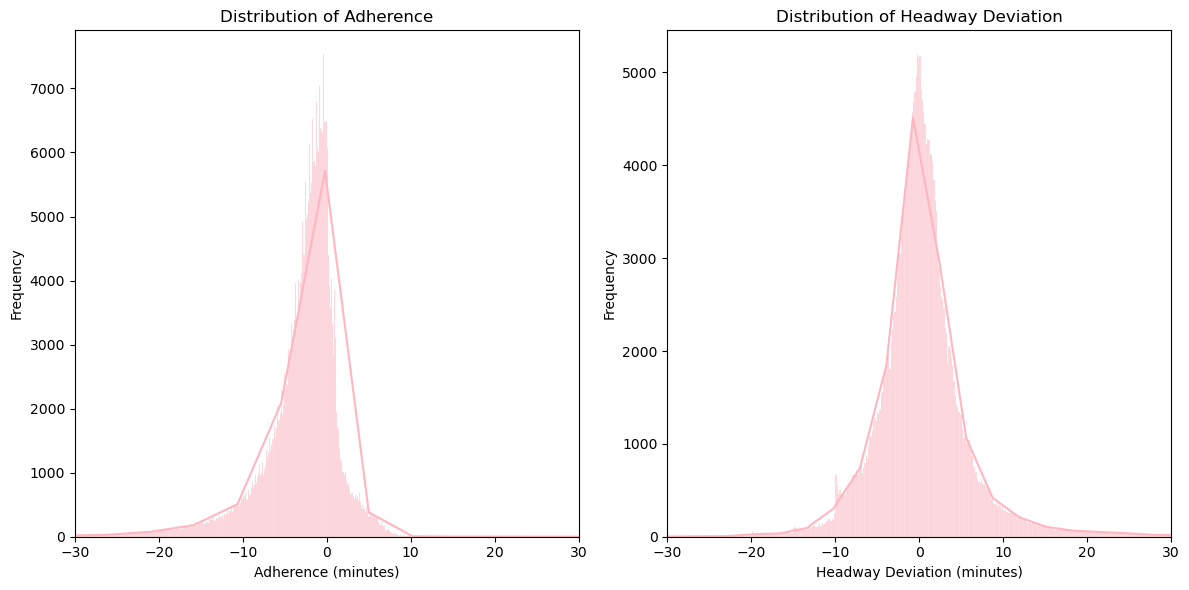

In [32]:
#Plots
plt.figure(figsize=(12, 6))

# Distribution of adherence
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['ADHERENCE'], kde=True, color='lightpink')
plt.title('Distribution of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.xlim(left=-30, right=30)

# Distribution of headway deviation
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['HDWY_DEV'], kde=True, color='lightpink')
plt.title('Distribution of Headway Deviation')
plt.xlabel('Headway Deviation (minutes)')
plt.ylabel('Frequency')
plt.xlim(left=-30, right=30)

plt.tight_layout()
plt.show()

C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


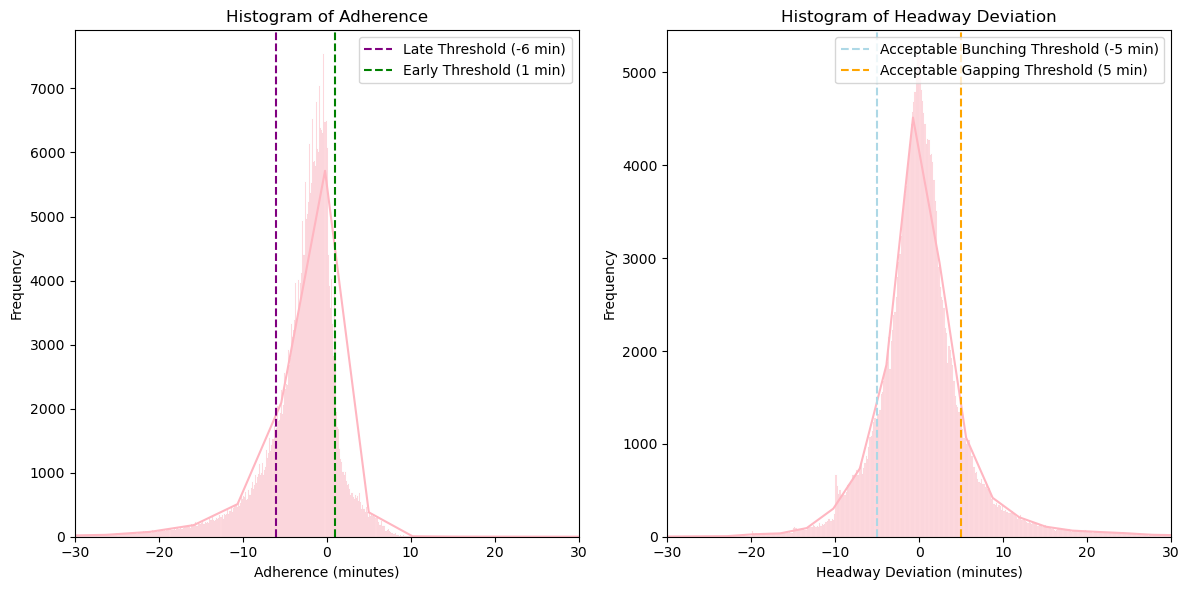

In [47]:
#Histograms with pretty lines
plt.figure(figsize=(12, 6))

#'ADHERENCE' variable
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['ADHERENCE'], kde=True, color='lightpink')
plt.title('Histogram of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='purple', linestyle='--', label='Late Threshold (-6 min)')  # Adding a line indicating late threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (1 min)')  # Addin a line indicating early threshold
plt.xlim(left=-30, right=30)
plt.legend()

#'HDWY_DEV' variable
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['HDWY_DEV'], kde=True, color='lightpink')
plt.title('Histogram of Headway Deviation')
plt.xlabel('Headway Deviation (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-5, color='lightblue', linestyle='--', label='Acceptable Bunching Threshold (-5 min)')  # Adding a line indicating acceptable bunching threshold
plt.axvline(x=5, color='orange', linestyle='--', label='Acceptable Gapping Threshold (5 min)')  # Add a line indicating acceptable gapping threshold
plt.xlim(left=-30, right=30)
plt.legend()

plt.tight_layout()
plt.show()